### Problem Statement

You are a data scientist / AI engineer at a meteorological consulting firm. You have been provided with a dataset named **`"weather_data.csv"`**, which includes detailed records of various weather conditions. The dataset comprises the following columns:

- `hours_sunlight:` The total number of hours of sunlight received in a day.
- `humidity_level:` The humidity level as a percentage.
- `daily_temperature:` The temperature recorded at the end of the day in degrees Celsius.

Your task is to use this dataset to build a linear regression model to predict the daily temperature based on the hours of sunlight and humidity level. You will need to split the data into training and test sets, train the model, and evaluate its performance using appropriate metrics.

**Import Necessary Libraries**

In [2]:
# Import necessary libraries
import pandas as pd 


### Task 1: Data Preparation and Exploration
1. Import the data from the `"weather_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset.

In [3]:

# Step 1: Import the data from the "song_popularity.csv" file and store it in a variable 'df'
df = pd.read_csv("weather_data.csv")


# Step 2: Display the number of rows and columns in the dataset
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} cols")
print("\nMissing values:\n", df.isna().sum())
display(df.head())

# Step 3: Display the first few rows of the dataset to get an overview


Shape: 49 rows × 3 cols

Missing values:
 hours_sunlight       0
humidity_level       0
daily_temperature    0
dtype: int64


,hours_sunlight,humidity_level,daily_temperature
0,10.5,65,22.3
1,9.2,70,21.0
2,7.8,80,18.5
3,6.4,90,17.2
4,8.1,75,19.4


In [12]:
# Step 4: Check for any missing values in the dataset


### Task 2: Train a Linear Regression Model

1. Select the features (hours_sunlight, humidity_level) and the target variable (daily_temperature) for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Create a Linear Regression model and fit it using the training data.
4. Print the model's coefficients and intercept.

In [4]:
# Step 1: Select the features and target variable for modeling

X = df[["hours_sunlight", "humidity_level"]]  # features
y = df["daily_temperature"]                  # target
# Step 2: Split the data into training and test sets with a test size of 30%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [5]:
# Step 3: Create a Linear Regression model and fit it using the training data
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Print the model's coefficients and intercept
print("Intercept (b):", model.intercept_)
print("Coefficients (m):", model.coef_)

Intercept (b): 11.511007935418261
Coefficients (m): [ 1.25083729 -0.02763612]


### Task 3: Model Evaluation

1. Make predictions on the test set using the trained model.
2. Evaluate the model using Mean Squared Error (MSE) and R-squared (R2) metrics.
3. Print the MSE and R2 values.
4. Display the first few actual vs. predicted values for the daily temperature.

In [7]:
# Step 1: Make predictions on the test set using the trained modely_pred = model.predict(X_test)
y_pred = model.predict(X_test)

# Step 2: Evaluate the model using Mean Squared Error (MSE) and R-squared (R2) metrics

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

In [9]:
# Step 3: Print the MSE and R2 values

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
# Step 4: Display the first few actual vs. predicted values for the daily temperature
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results.head())

Mean Squared Error (MSE): 0.11488330185581289
R² Score: 0.9833806480142233
    Actual  Predicted
13    18.7  18.736670
45    17.0  16.944765
47    21.3  21.334350
44    23.9  23.431695
17    19.6  19.847885


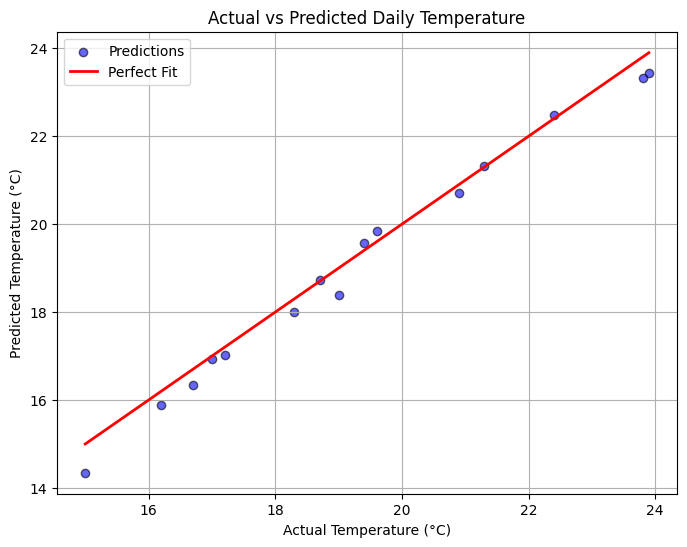

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Scatter plot of Actual vs Predicted
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, edgecolor="k", label="Predictions")

# Perfect prediction line (y = x)
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color="red", linewidth=2, label="Perfect Fit")

plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Actual vs Predicted Daily Temperature")
plt.legend()
plt.grid(True)
plt.show()

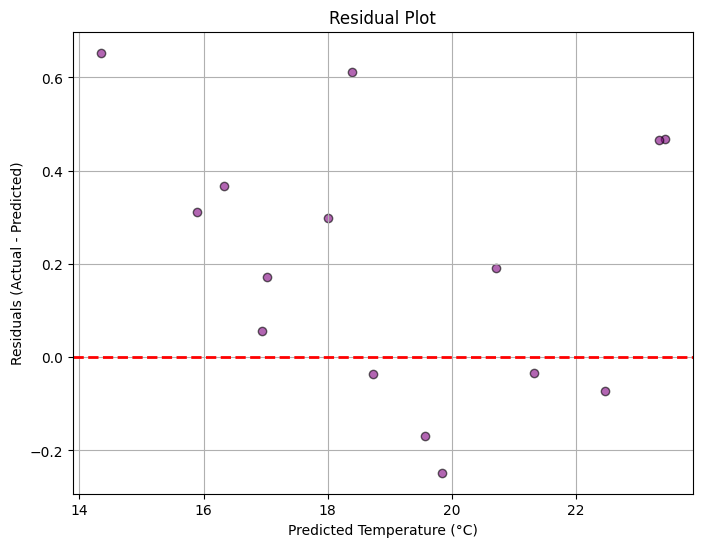

In [11]:
# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color="purple", alpha=0.6, edgecolor="k")

# Add zero line (perfect fit reference)
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)

plt.xlabel("Predicted Temperature (°C)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()